## Import Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [34]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


## Inspect and Clean Dataset

In [6]:
print(df.shape)

(344, 7)


#### Shape of dataframe is 344 rows and 7 columns

In [3]:
#check for nulls 
print(df.isna().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [27]:
## since the amount of nulls in the columns are small in comparison to sample, we are going to drop these values
#insert true as argument to manipulate original dataframe
df.dropna(inplace=True)

#check that null values are dropped
print(df.isna().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [28]:
#check for duplicates
print(df.duplicated().sum())

##output shows that there are no duplicate values

0


## Calculate Descriptive Statistics

In [29]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Start with Measures of Central Tendency 

In [35]:
#select only numerical columns
numerical_cols = df.select_dtypes(include='number').columns

In [36]:
print(type(numerical_cols))

<class 'pandas.core.indexes.base.Index'>


In [38]:
#calculate mean and median using numpy and then mode with pandas

for col in numerical_cols:

    mean = round(np.mean(df[col]),2)
    median = round(np.median(df[col]),2)
    mode= round(df[col].mode()[0],2)

    print(col)
    print(f"Mean: {mean}, Median: {median}, Mode: {mode}")

bill_length_mm
Mean: 43.99, Median: 44.5, Mode: 41.1
bill_depth_mm
Mean: 17.16, Median: 17.3, Mode: 17.0
flipper_length_mm
Mean: 200.97, Median: 197.0, Mode: 190.0
body_mass_g
Mean: 4207.06, Median: 4050.0, Mode: 3800.0


### Compute Measures of Dispersion

In [41]:

for col in numerical_cols:


#find the variance and standard deviation
    variance = np.var(df[col],ddof=1)
    std_dev = np.std(df[col],ddof=1)

#find the range
    range_value = np.max(df["bill_length_mm"])-np.min(df["bill_length_mm"])

#compute 25,50, and 75 percentile and interquartile range
    q1 = np.percentile(df["bill_length_mm"],25)
    q2 = np.percentile(df["bill_length_mm"],50)
    q3 = np.percentile(df["bill_length_mm"],75)
    iqr = q3 - q1


    print(col)
    print(f"Variance: {variance:.2f}, Standard Deviation: {std_dev:.2f}")
    print(f"Range: {range_value:.2f}, IQR: {iqr:.2f}")
    



bill_length_mm
Variance: 29.91, Standard Deviation: 5.47
Range: 27.50, IQR: 9.10
bill_depth_mm
Variance: 3.88, Standard Deviation: 1.97
Range: 27.50, IQR: 9.10
flipper_length_mm
Variance: 196.44, Standard Deviation: 14.02
Range: 27.50, IQR: 9.10
body_mass_g
Variance: 648372.49, Standard Deviation: 805.22
Range: 27.50, IQR: 9.10


### Visualization using Histogram and Boxplots

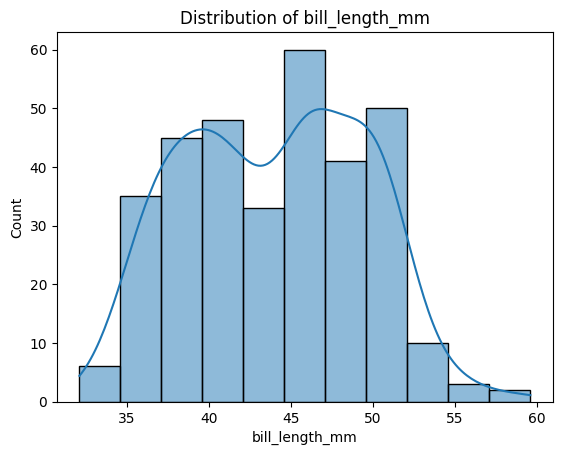

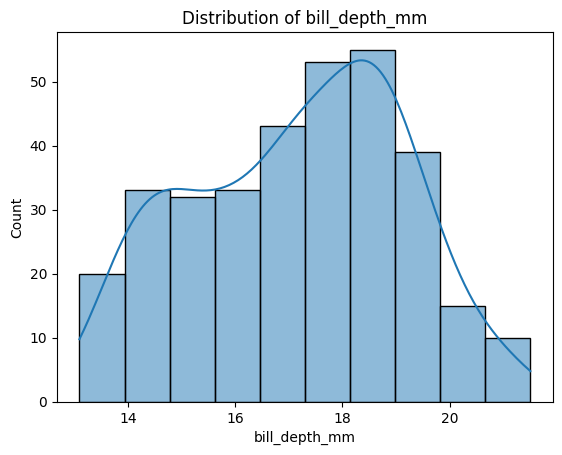

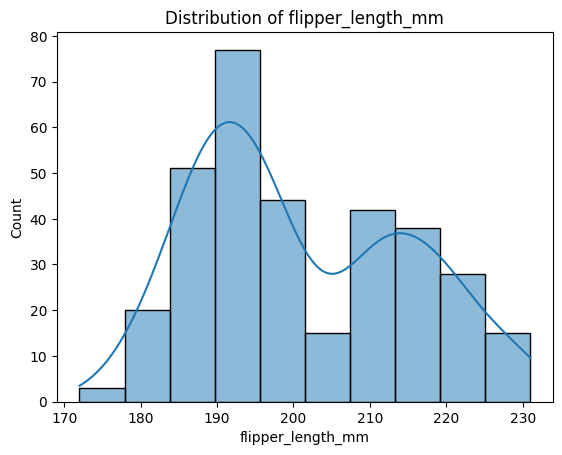

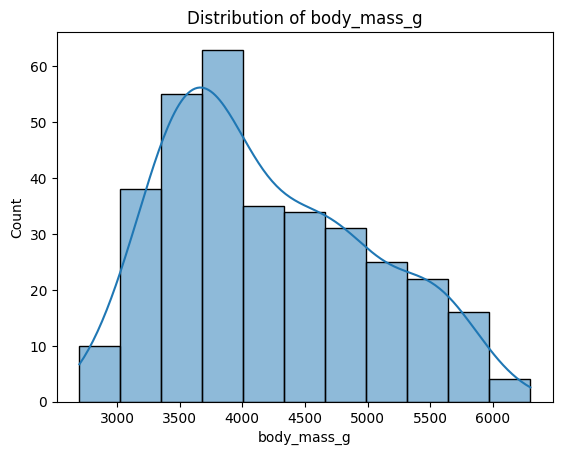

In [43]:
##histogram for bill length
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

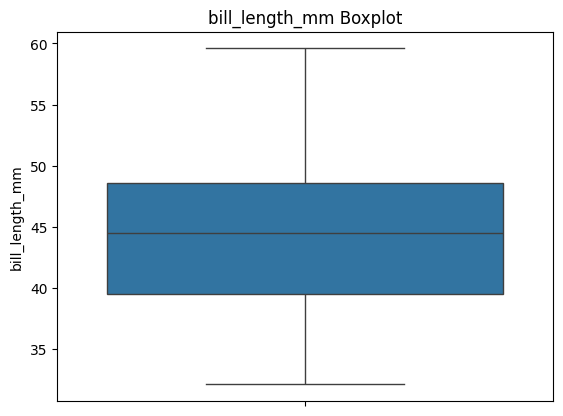

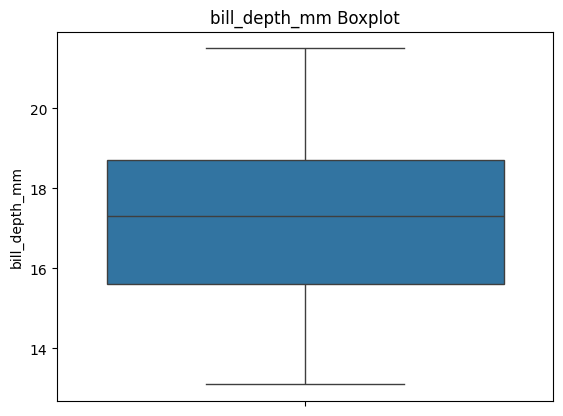

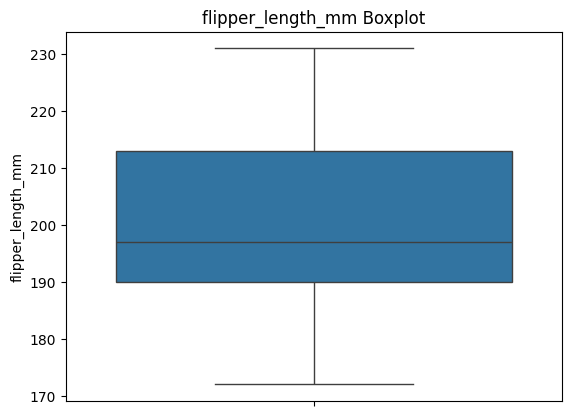

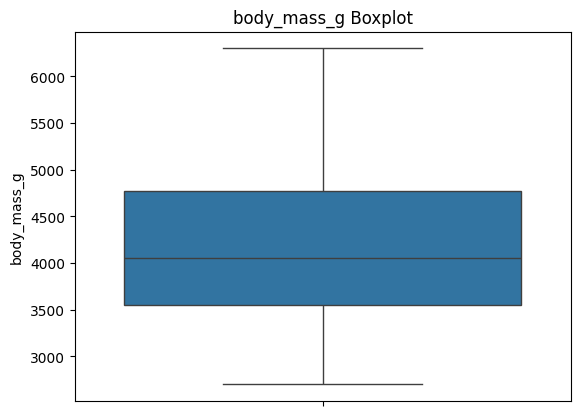

In [44]:
## boxplot for all numerical columns
for col in numerical_cols:

    sns.boxplot(df[col])
    plt.title(f"{col} Boxplot")
    plt.show()